## **Instalando o Keras & Scikit-learn**

In [ ]:
!pip install keras
!pip install scikit-learn

## Importando as bibliotecas necessárias


In [ ]:
data = pd.read_csv('/content/GOOG.csv')
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


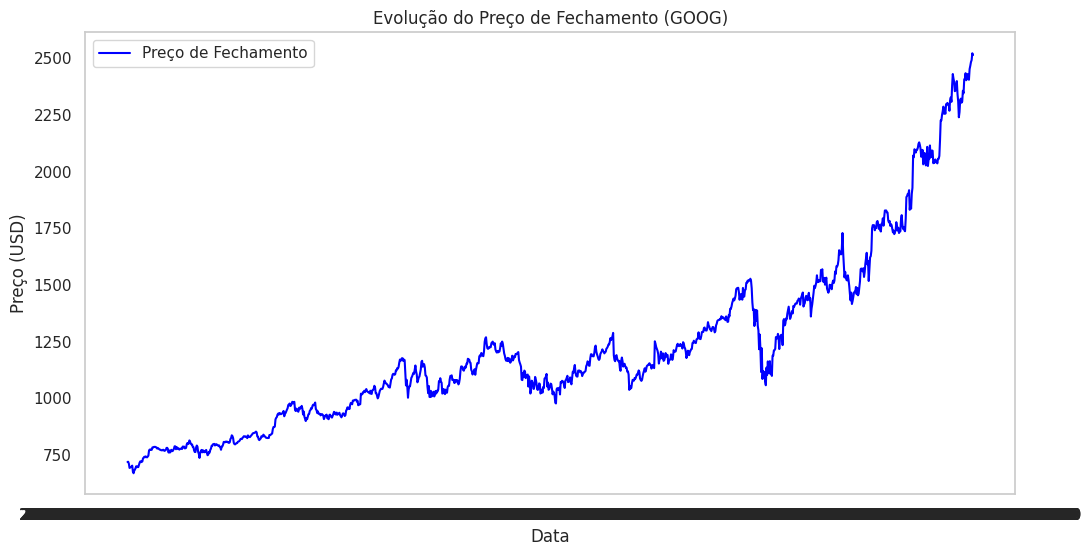

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['close'], label='Preço de Fechamento', color='blue')
plt.title('Evolução do Preço de Fechamento (GOOG)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid()
plt.show()

## Exploração dos dados

In [ ]:
print("\nNomes das colunas:")
print(data.columns.tolist())


Nomes das colunas:
['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor']


In [ ]:
print("Informações do Dataset:")
print(data.info())

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB
None


<ipython-input-7-342c84b71778>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_types.index.astype(str), y=data_types.values, palette="magma")


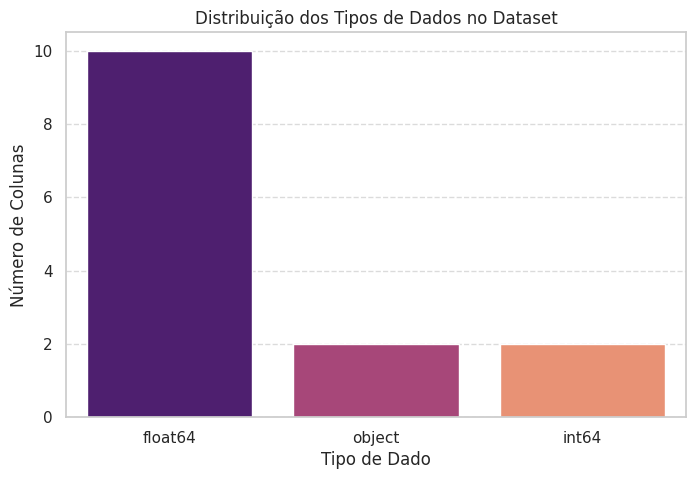

In [ ]:
data_types = data.dtypes.value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=data_types.index.astype(str), y=data_types.values, palette="magma")
plt.xlabel("Tipo de Dado")
plt.ylabel("Número de Colunas")
plt.title("Distribuição dos Tipos de Dados no Dataset")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
print("\nVerificando valores nulos:")
print(data.isnull().sum())


Verificando valores nulos:
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64


In [ ]:
print("\nPorcentagem de valores nulos:")
print((data.isnull().sum() / len(data)) * 100)


Porcentagem de valores nulos:
symbol         0.0
date           0.0
close          0.0
high           0.0
low            0.0
open           0.0
volume         0.0
adjClose       0.0
adjHigh        0.0
adjLow         0.0
adjOpen        0.0
adjVolume      0.0
divCash        0.0
splitFactor    0.0
dtype: float64


In [ ]:
nulos = (data.isnull().sum() / len(data)) * 100

nulos = nulos[nulos > 0]

if not nulos.empty:
    plt.figure(figsize=(8, 8))
    plt.pie(nulos, labels=nulos.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
    plt.title("Porcentagem de Valores Nulos por Coluna")
    plt.show()
else:
    print("Nenhuma coluna possui valores nulos.")

Nenhuma coluna possui valores nulos.


In [ ]:
print("\nEstatísticas descritivas:")
print(data.describe())


Estatísticas descritivas:
             close         high          low         open        volume  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03   
mean   1216.317067  1227.430934  1204.176430  1215.260779  1.601590e+06   
std     383.333358   387.570872   378.777094   382.446995  6.960172e+05   
min     668.260000   672.300000   663.284000   671.000000  3.467530e+05   
25%     960.802500   968.757500   952.182500   959.005000  1.173522e+06   
50%    1132.460000  1143.935000  1117.915000  1131.150000  1.412588e+06   
75%    1360.595000  1374.345000  1348.557500  1361.075000  1.812156e+06   
max    2521.600000  2526.990000  2498.290000  2524.920000  6.207027e+06   

          adjClose      adjHigh       adjLow      adjOpen     adjVolume  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03   
mean   1216.317067  1227.430936  1204.176436  1215.260779  1.601590e+06   
std     383.333358   387.570873   378.777099   382.446995  6.960172e+05 

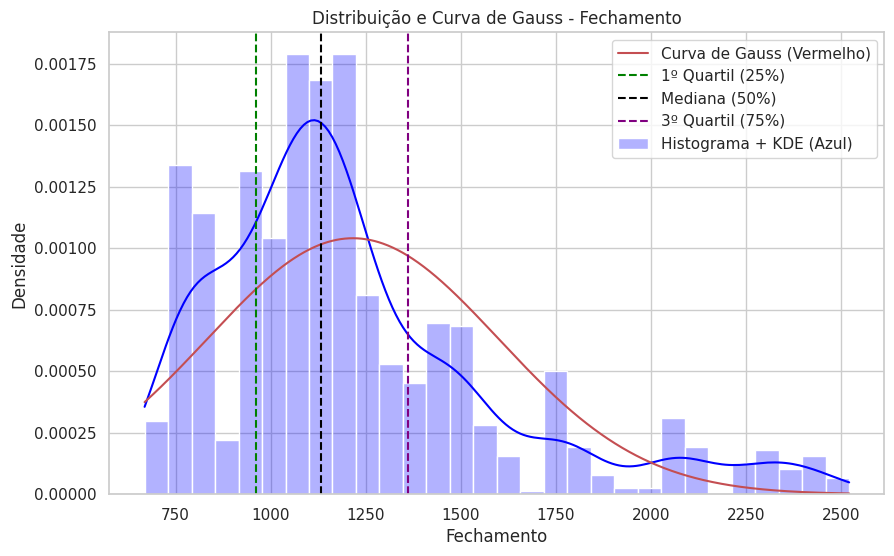

In [ ]:
coluna = "close"

media = data[coluna].mean()
desvio = data[coluna].std()
q1 = data[coluna].quantile(0.25)
q2 = data[coluna].quantile(0.50)
q3 = data[coluna].quantile(0.75)

x = np.linspace(data[coluna].min(), data[coluna].max(), 1000)
y = norm.pdf(x, media, desvio)

plt.figure(figsize=(10, 6))
sns.histplot(data[coluna], bins=30, kde=True, color="blue", stat="density", alpha=0.3, label="Histograma + KDE (Azul)")
plt.plot(x, y, 'r', label="Curva de Gauss (Vermelho)")

plt.axvline(q1, color="green", linestyle="--", label="1º Quartil (25%)")
plt.axvline(q2, color="black", linestyle="--", label="Mediana (50%)")
plt.axvline(q3, color="purple", linestyle="--", label="3º Quartil (75%)")

plt.title(f"Distribuição e Curva de Gauss - Fechamento")
plt.xlabel("Fechamento")
plt.ylabel("Densidade")
plt.legend()
plt.show()


### Descobrindo nossa Data inicial e Data final para podermos definir o look-back

In [ ]:
data['date'].head() #verificar a granulaidade da data

,date
0,2016-06-14 00:00:00+00:00
1,2016-06-15 00:00:00+00:00
2,2016-06-16 00:00:00+00:00
3,2016-06-17 00:00:00+00:00
4,2016-06-20 00:00:00+00:00


In [ ]:
data['date'].min(), data['date'].max()

('2016-06-14 00:00:00+00:00', '2021-06-11 00:00:00+00:00')

In [ ]:
data['date'] = pd.to_datetime(data['date'])

linhas_unicas = data['date'].nunique()

linhas_repetidas = data[data.duplicated(subset=['date'], keep=False)]
total_linhas_repetidas = len(linhas_repetidas)

total_dias_periodo = (data['date'].max() - data['date'].min()).days + 1
dias_reais = linhas_unicas
diferenca_dias = total_dias_periodo - dias_reais

print(f"Total de linhas únicas: {linhas_unicas}")
print(f"Linhas repetidas (datas duplicadas): {total_linhas_repetidas}")
if total_linhas_repetidas > 0:
    print("Datas duplicadas encontradas:")
    print(linhas_repetidas[['date']].drop_duplicates())
print(f"Dias reais de negociação: {dias_reais}")
print(f"Diferença de dias: {diferenca_dias}")

Total de linhas únicas: 1258
Linhas repetidas (datas duplicadas): 0
Dias reais de negociação: 1258
Diferença de dias: 566


## Conclusão


Analisamos os dados conseguimos inditificar que este dataset contém dados históricos de ações da Alphabet Inc. (GOOG), referentes ao período de junho a agosto de 2016. Cada linha representa um dia de negociação e inclui informações detalhadas sobre preços e volume. Aqui está a explicação das colunas:

Colunas Principais:

1.   symbol: Representa o ticker da ação (GOOG, neste caso).
2.   date: Data da negociação (em formato UTC).
3.   close: Preço de fechamento do dia.
4.   high: Preço máximo atingido no dia.
5.   low: Preço mínimo do dia.
6.   open: Preço de abertura do dia.
7.   volume: Número de ações negociadas no dia.

## Criando a função

In [ ]:
# Criar sequências de dados para a RNN
def create_dataset(data, look_back=1):
    # Inicializa listas vazias para armazenar os dados de entrada (X) e saída (y)
    X, y = [], []

    # Itera sobre o conjunto de dados, parando antes do comprimento total menos o look_back
    for i in range(len(data) - look_back):
        # Adiciona uma janela de dados de entrada à lista X
        # O slice data[i:(i + look_back), 0] pega os dados desde o índice i até i + look_back; o valor 0 indica a coluna
        X.append(data[i:(i + look_back), 0])  # Dados de entrada

        # Adiciona o próximo valor (o que segue a janela de entrada) à lista y
        # O índice i + look_back se refere ao valor que queremos prever
        y.append(data[i + look_back, 0])      # Dados de saída

    # Converte as listas X e y em arrays NumPy e retorna
    return np.array(X), np.array(y)

## Preparando o modelo

In [ ]:
data = pd.read_csv('/content/GOOG.csv')

# Converter a coluna Date para o tipo datetime
data['date'] = pd.to_datetime(data['date'])

# Selecionar apenas a coluna 'Close' para previsão
data = data[['date', 'close']].set_index('date')

# Normalizar os dados para que fiquem entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['close'].values.reshape(-1, 1))

### Criar Conjuntos de Treinamento e Teste

In [ ]:
# Definir o tamanho da janela (look-back)
look_back = 252

# Usar os últimos 252 dias para previsão porque é o número de
# dias de negociação é derivado da exclusão de finais de semana e feriados
# do total de dias do ano.

# Criar os conjuntos de dados
X, y = create_dataset(scaled_data, look_back)

# Redimensionar os dados para [amostras, passos do tempo, características]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Dividir em conjunto de treinamento e teste (80% para treinamento, 20% para teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Mostrar a forma dos conjuntos de dados
#(número de linhas,número de passos de tempo ou o look-back, número de colunas)
print(f'Treinamento: {X_train.shape}, Teste: {X_test.shape}')

Treinamento: (804, 252, 1), Teste: (202, 252, 1)


### Construir a Rede Neural Recorrente (RNN)

In [ ]:
# Criar o modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # Primeira camada LSTM
model.add(Dropout(0.2))  # Camada Dropout para evitar overfitting
model.add(LSTM(100, return_sequences=True))  # Segunda camada LSTM
model.add(Dropout(0.2))  # Camada Dropout
model.add(LSTM(50, return_sequences=True))  # Terceira camada LSTM
model.add(Dropout(0.2))  # Camada Dropout
model.add(LSTM(20, return_sequences=False))  # Quarta camada LSTM (última camada LSTM)
model.add(Dense(1))  # Camada de saída para previsão do preço

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Mostrar a arquitetura do modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 252, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 252, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 252, 100)            │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 252, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 252, 50)             │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 252, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 20)                  │           5,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,701 (416.80 KB)

 Trainable params: 106,701 (416.80 KB)

 Non-trainable params: 0 (0.00 B)

## Fazer Previsões

In [ ]:
model.fit(X_train, y_train, epochs=150, batch_size=32)

Epoch 1/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 24s 540ms/step - loss: 0.0212
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 532ms/step - loss: 0.0023
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 539ms/step - loss: 0.0016
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 590ms/step - loss: 0.0011
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 536ms/step - loss: 0.0013
Epoch 6/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 536ms/step - loss: 0.0016
Epoch 7/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 536ms/step - loss: 0.0011
Epoch 8/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 662ms/step - loss: 0.0011
Epoch 9/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 648ms/step - loss: 7.9594e-04
Epoch 10/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 533ms/step - loss: 0.0011
Epoch 11/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 530ms/step - loss: 8.4589e-04
Epoch 12/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 537ms/step - loss: 7.4253e-04
Epoch 13/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 535ms/step - loss: 8.7086e-04
Epoch 14/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 536ms/step - loss: 8.3964e-04
Epoch 15/

### Prever o próximo 3 dias

In [ ]:
# Prever o próximo valor
last_data = scaled_data[-look_back:].reshape(1, look_back, 1)  # Últimos 90 dias para previsão
predicted_produc = model.predict(last_data)  # Fazer a previsão

# Inverter a normalização para obter o preço real
predicted_produc = scaler.inverse_transform(predicted_produc)
print(f'Produção prevista para o dia seguinte: {predicted_produc[0][0]:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step
Produção prevista para o dia seguinte: 2355.29


In [ ]:
# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Inverter a normalização das previsões
predictions = scaler.inverse_transform(predictions)

# Calcular RMSE
rmse = np.sqrt(np.mean(np.square(predictions - scaler.inverse_transform(y_test.reshape(-1, 1)))))
print(f'Root Mean Squared Error: {rmse:.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step
Root Mean Squared Error: 78.04


In [ ]:
# Prever as três próximas amostras
predicted_prices = []

# Usar os últimos 90 dias para começar
last_data = scaled_data[-look_back:].reshape(1, look_back, 1)

for _ in range(3):  # Prever 3 dias
    predicted_price = model.predict(last_data)  # Fazer a previsão
    predicted_prices.append(predicted_price[0][0])  # Armazenar a previsão

    # Atualizar last_data para incluir a nova previsão
    last_data = np.append(last_data[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

# Inverter a normalização para obter os preços reais
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Mostrar os preços previstos para os próximos 3 dias
for i, price in enumerate(predicted_prices, start=1):
    print(f'Preço previsto para o dia {i} a partir de 2020-01-24: {price[0]:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Preço previsto para o dia 1 a partir de 2020-01-24: 2355.29
Preço previsto para o dia 2 a partir de 2020-01-24: 2201.26
Preço previsto para o dia 3 a partir de 2020-01-24: 2073.38


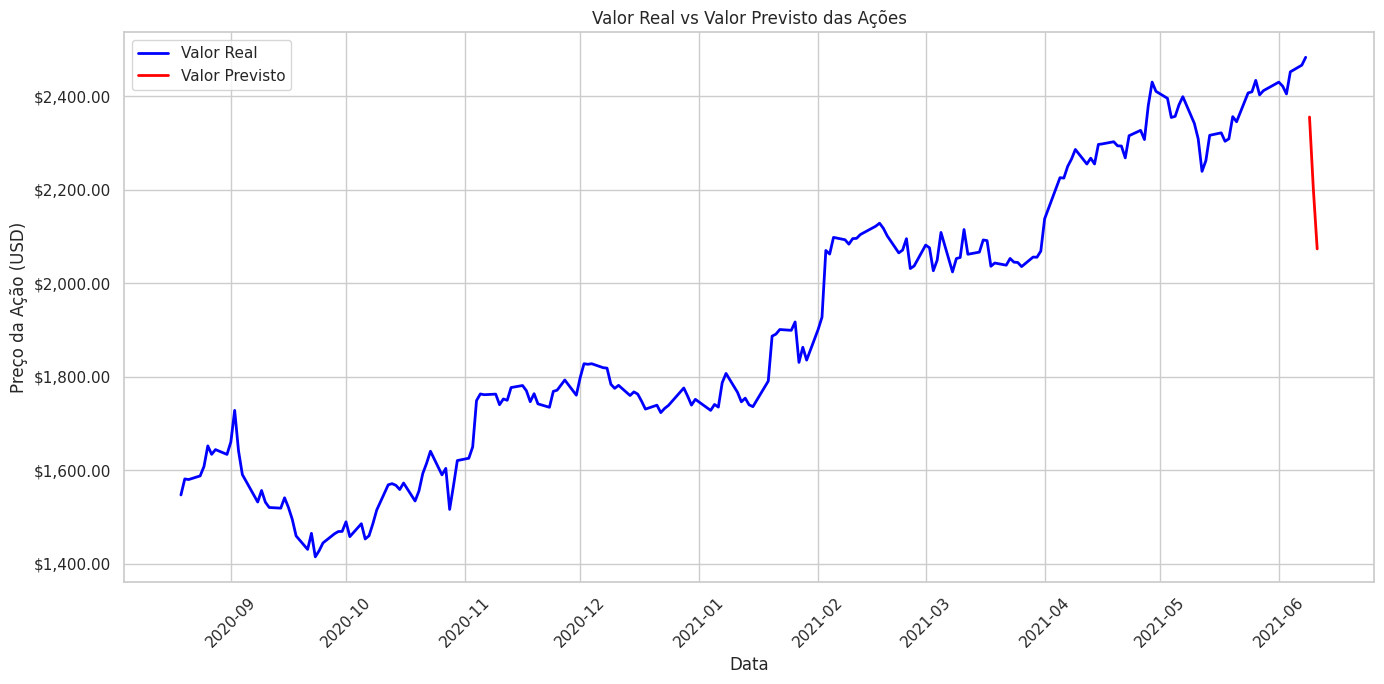

In [ ]:
# Criar um DataFrame com os dados reais
real_prices = data['close'].values[-(len(y_test) + 3):]  # Inclui os últimos valores reais + 3 previsões

# Concatenar as previsões com os preços previstos para os próximos 3 dias
predicted_prices_full = np.concatenate([predictions.flatten(), predicted_prices.flatten()])

# Criar o índice para os dias
dates = data.index[-(len(y_test) + 3):]  # Últimos índices

# Plotar
plt.figure(figsize=(14, 7))
plt.plot(dates[:len(y_test)], real_prices[:len(y_test)], color='blue', label='Valor Real', linewidth=2)
plt.plot(dates[len(y_test):], predicted_prices_full[len(y_test):], color='red', label='Valor Previsto', linewidth=2)
plt.title('Valor Real vs Valor Previsto das Ações')
plt.xlabel('Data')
plt.ylabel('Preço da Ação (USD)')

# Formatar eixo Y para dólares
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.2f}'))

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Prever o próximo 15 dias

In [ ]:
# Prever as três próximas amostras
predicted_prices = []

last_data = scaled_data[-look_back:].reshape(1, look_back, 1)

for _ in range(15):  # Prever 15 dias
    predicted_price = model.predict(last_data)  # Fazer a previsão
    predicted_prices.append(predicted_price[0][0])  # Armazenar a previsão

    # Atualizar last_data para incluir a nova previsão
    last_data = np.append(last_data[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

# Inverter a normalização para obter os preços reais
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Mostrar os preços previstos para os próximos 3 dias
for i, price in enumerate(predicted_prices, start=1):
    print(f'Preço previsto para o dia {i} a partir de 2020-01-24: {price[0]:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Preço previsto para o dia 1 a partir de 2020-01-24: 2355.29
Preço previsto para o dia 2 a partir de 2020-01-24: 2201.26
Preço previsto para o dia 3 a partir de 2020-01-24: 2073.38
Preço previsto para o dia 4 a partir de 2020-01-24: 1977.10
Preço previsto para o dia 5 a partir de 2020-01-24: 1902.14
Preço previsto para o dia 6 a partir de 2020-01-24: 1845.28
Preço previsto para o dia 7 a partir de 2020-01-24: 179

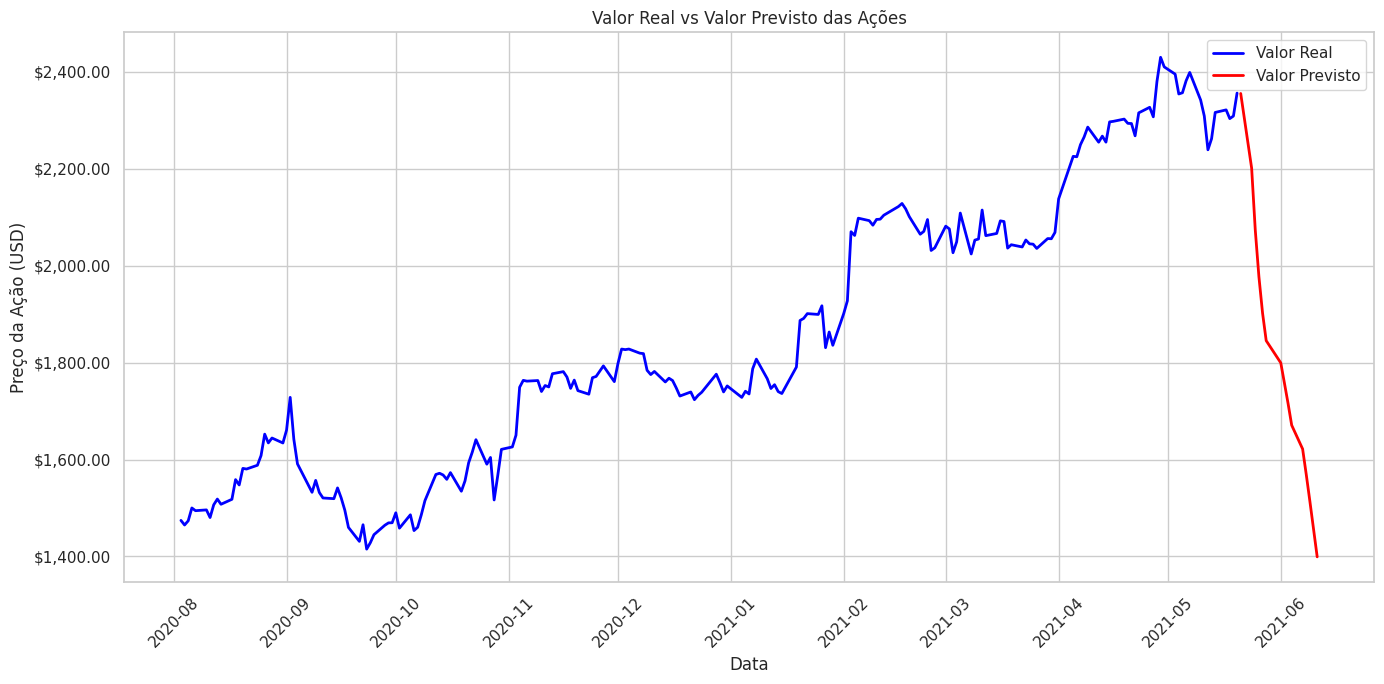

In [ ]:
# Criar um DataFrame com os dados reais
real_prices = data['close'].values[-(len(y_test) + 15):]

predicted_prices_full = np.concatenate([predictions.flatten(), predicted_prices.flatten()])

dates = data.index[-(len(y_test) + 15):]

# Plotar
plt.figure(figsize=(14, 7))
plt.plot(dates[:len(y_test)], real_prices[:len(y_test)], color='blue', label='Valor Real', linewidth=2)
plt.plot(dates[len(y_test):], predicted_prices_full[len(y_test):], color='red', label='Valor Previsto', linewidth=2)
plt.title('Valor Real vs Valor Previsto das Ações')
plt.xlabel('Data')
plt.ylabel('Preço da Ação (USD)')

# Formatar eixo Y para dólares
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.2f}'))

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Prever o próximo 30 dias

In [ ]:
# Prever as três próximas amostras
predicted_prices = []

# Usar os últimos 90 dias para começar
last_data = scaled_data[-look_back:].reshape(1, look_back, 1)

for _ in range(30):  # Prever 3 dias
    predicted_price = model.predict(last_data)  # Fazer a previsão
    predicted_prices.append(predicted_price[0][0])  # Armazenar a previsão

    # Atualizar last_data para incluir a nova previsão
    last_data = np.append(last_data[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

# Inverter a normalização para obter os preços reais
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Mostrar os preços previstos para os próximos 3 dias
for i, price in enumerate(predicted_prices, start=1):
    print(f'Preço previsto para o dia {i} a partir de 2020-01-24: {price[0]:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

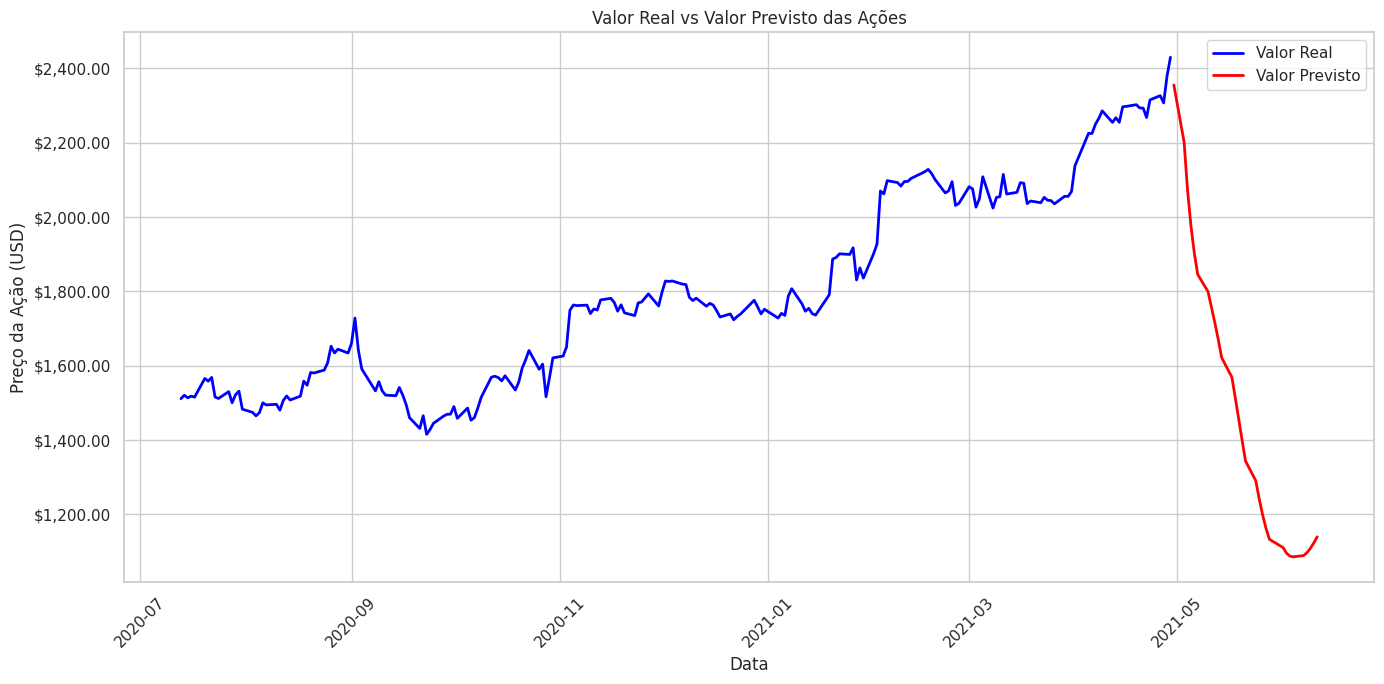

In [ ]:
# Criar um DataFrame com os dados reais
real_prices = data['close'].values[-(len(y_test) + 30):]

predicted_prices_full = np.concatenate([predictions.flatten(), predicted_prices.flatten()])

dates = data.index[-(len(y_test) + 30):]

# Plotar
plt.figure(figsize=(14, 7))
plt.plot(dates[:len(y_test)], real_prices[:len(y_test)], color='blue', label='Valor Real', linewidth=2)
plt.plot(dates[len(y_test):], predicted_prices_full[len(y_test):], color='red', label='Valor Previsto', linewidth=2)
plt.title('Valor Real vs Valor Previsto das Ações')
plt.xlabel('Data')
plt.ylabel('Preço da Ação (USD)')

# Formatar eixo Y para dólares
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.2f}'))

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Comparação dos dados Reais com nosso modelo

Média das previsões: R$1453.65
Média real: R$1920.77


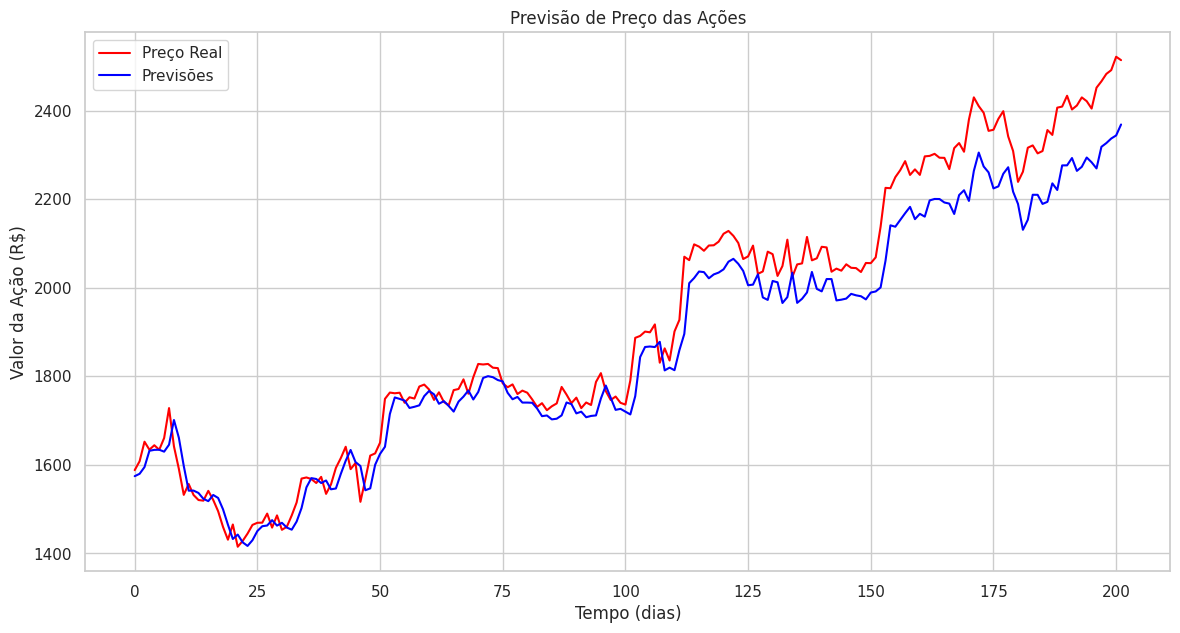

In [ ]:
# Calcular médias
media_previsoes = predicted_prices.flatten().mean()
media_real = scaler.inverse_transform(y_test.reshape(-1, 1)).mean()

print(f"Média das previsões: R${media_previsoes:.2f}")
print(f"Média real: R${media_real:.2f}")

# Plotar gráfico
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='red', label='Preço Real')  # Preços reais
plt.plot(predictions, color='blue', label='Previsões')  # Previsões do conjunto de teste
plt.title('Previsão de Preço das Ações')
plt.xlabel('Tempo (dias)')
plt.ylabel('Valor da Ação (R$)')
plt.legend()
plt.show()
